# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Homework 0 - Knowledge Test - Predict Lending Club Defaulters



**Harvard University**<br/>
**Spring 2019**<br/>
**Instructors**: Pavlos Protopapas, Mark Glickman

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit.
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- *This is an indvidual HW and not graded.* 
- *The purpose of this homework is knowledge test, not to invest money on LendingClub.*  

<hr style="height:2pt">

![Lending club](https://blog.lendingclub.com/wp-content/uploads/2017/05/LC-Logo-Official-min.png)


### Overview 

[Lending Club](https://en.wikipedia.org/wiki/Lending_Club) is the world's largest peer-to-peer lending platform. The company claims that \$15.98 billion in loans had been originated through its platform up to December 31, 2015.  Lending Club enables borrowers to create unsecured personal loans between \$1,000 and \$40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers an origination fee and investors a service fee.

The dataset for this homework is derived from the full version of [Loan Data](https://www.lendingclub.com/info/download-data.action). Loans are for period Q3-2014, Q4-2015 and Q1-2015. We have done some preprocessing for you. 

Data dictionary is available for your reference in data folder. (Please note that purpose and verification status have been one hot encoded, see data dictionary.) 

### Use only the libraries below:

In [3]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm #Linear Regression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss, accuracy_score

from keras.callbacks import EarlyStopping, ModelCheckpoint


import keras 
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Dropout      # create layers

from sklearn.ensemble import BaggingClassifier



<hr style="height:2pt">

### Problem 1 - Data Exploration

**1.1 Load the dataset from the csv file `data/loans_cs109b.csv` into a pandas dataframe.**  

**Display `.shape()` and `.head()` of the dataframe. Which columns are categorical columns (Identify categorical columns programmatically) ? **

**Your target column is `loan_status`. Is it a classification problem or a regression problem? **

In [4]:
# your code here
df = pd.read_csv('data/loans_cs109b.csv')
print(df.shape) 
df.head()

(190287, 87)


,loan_amnt,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,url,title,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,Not Verified,Source Verified,Verified
0,10400,6.99%,A,A3,8.0,1,58000.0,0,114662,4,...,0,0,0,0,0,0,0,1,0,0
1,15000,12.39%,C,C1,10.0,3,78000.0,1,120463,6,...,0,0,0,0,0,0,0,0,1,0
2,7650,13.66%,C,C3,0.0,3,50000.0,0,117549,6,...,0,0,0,0,0,0,0,0,1,0
3,21425,15.59%,D,D1,6.0,3,63800.0,1,119764,4,...,0,0,0,0,0,0,0,0,1,0
4,9600,13.66%,C,C3,10.0,3,69000.0,1,119482,6,...,0,0,0,0,0,0,0,0,1,0


In [5]:
# your code here
df.dtypes[df.dtypes=='object']

int_rate     object
grade        object
sub_grade    object
dtype: object

*Your answer here*

<font color='blue'>This is a classification problem. 
`grade`, `sub_grade` and `int_rate` are categorical columns. Ideally `int_rate` should be numeric.
</font> 


**1.2 Create a plot showing distribution of target column.  Interpret your plot.**

1    0.807139
0    0.192861
Name: loan_status, dtype: float64


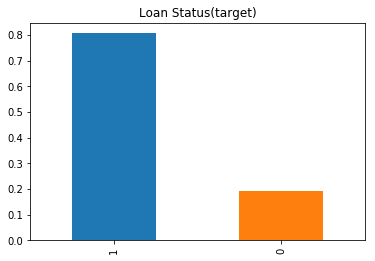

In [6]:
# your code here
print(df['loan_status'].value_counts(normalize=True))
df['loan_status'].value_counts(normalize=True).plot.bar()
plt.title('Loan Status(target)');

*your answer here*

<font color='blue'>Imbalanced classification problem.</font> 


**1.3 Create a visualization showing `grade` and `loan_status`. Do the same for `sub_grade` as well. Interpret your plots.**

**Hints:**
*Your plot should be able to convey which grade (or subgrade) has highest (and least) number of defaulters. You may create a table or a heatmap.*


In [7]:
# your code here
pd.DataFrame(pd.crosstab(df['loan_status'], df['grade'],margins=True)).style.background_gradient(cmap='Pastel2')

grade,A,B,C,D,E,F,G,All
loan_status,,,,,,,,
0,1969,6205,10836,9104,5831,2080,674,36699
1,33849,44349,41441,21658,9071,2576,644,153588
All,35818,50554,52277,30762,14902,4656,1318,190287


In [8]:
# your code here
pd.DataFrame(pd.crosstab(df['loan_status'], df['grade'],margins=True, normalize='columns')).style.background_gradient(cmap='Pastel2')


grade,A,B,C,D,E,F,G,All
loan_status,,,,,,,,
0,0.0549724,0.12274,0.20728,0.29595,0.39129,0.446735,0.511381,0.192861
1,0.945028,0.87726,0.79272,0.70405,0.60871,0.553265,0.488619,0.807139


*your answer here*

<font color='blue'>Grade G has highest percentage of default. </font> 


In [9]:
# your code here
pd.DataFrame(pd.crosstab(df['loan_status'], df['sub_grade'],margins=True)).style.background_gradient(cmap='Pastel2')

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,All
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,135,246,245,510,833,850,1011,1271,1465,1608,1941,2207,2213,2368,2107,2099,1945,1735,1773,1552,1476,1363,1171,951,870,630,438,416,347,249,219,163,114,93,85,36699
1,5100,5560,5378,8099,9712,7981,8571,9144,9369,9284,9472,9175,8375,7760,6659,5807,4688,4282,3820,3061,2601,2175,1748,1391,1156,841,570,497,372,296,211,168,127,78,60,153588
All,5235,5806,5623,8609,10545,8831,9582,10415,10834,10892,11413,11382,10588,10128,8766,7906,6633,6017,5593,4613,4077,3538,2919,2342,2026,1471,1008,913,719,545,430,331,241,171,145,190287


In [10]:
# your code here
pd.DataFrame(pd.crosstab(df['loan_status'], df['sub_grade'],margins=True,normalize='columns')).T.style.background_gradient(cmap='Pastel2')


loan_status,0,1
sub_grade,,
A1,0.025788,0.974212
A2,0.04237,0.95763
A3,0.043571,0.956429
A4,0.0592403,0.94076
A5,0.0789948,0.921005
B1,0.0962518,0.903748
B2,0.10551,0.89449
B3,0.122036,0.877964
B4,0.135222,0.864778


*your answer here*
<font color='blue'>Sub Grade G5 has highest percentage of default. </font> 


**1.4 (a) Create a plot showing average debt to income ratio vs. grade**

** (b) Create a plot showing number of loans vs. loan purpose.  **

** (c) Create a plot showing average interest rate vs grade. Interpret your plots.** 

*Hint: Look up the data dictionary.*



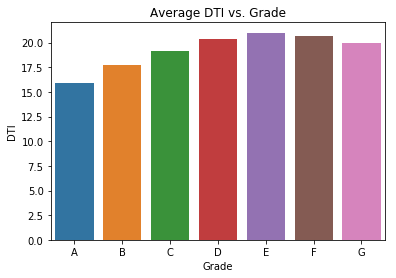

In [11]:
# your code here
#1.4 (a)
ax = sns.barplot(x='grade', y='dti', data=df.groupby('grade')['dti'].mean().reset_index())
ax.set(xlabel='Grade', ylabel='DTI');
ax.set_title('Average DTI vs. Grade');

<font color='blue'> As expected debt to income ratio is least for Grade A. On the contrary Grade E has the highest DTI ratio. </font>

car                     1539
credit_card            42850
debt_consolidation    117330
home_improvement        9846
house                    645
major_purchase          3159
medical                 1827
moving                  1210
other                   8993
renewable_energy         123
small_business          1736
vacation                1023
wedding                    6
dtype: int64


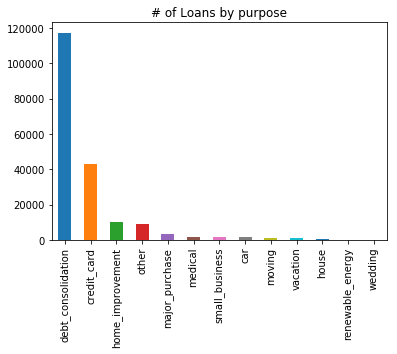

In [38]:
purpose_columns = ['car', 'credit_card', 'debt_consolidation',
                   'home_improvement', 'house', 'major_purchase',
                   'medical', 'moving', 'other',
                   'renewable_energy', 'small_business','vacation','wedding']

print(df[purpose_columns].sum())
df[purpose_columns].sum().sort_values(ascending=False).plot(kind='bar',title='# of Loans by purpose');

<font color='blue'> Debt consolidation is the largest category for loan applications, wedding being the least. </font>

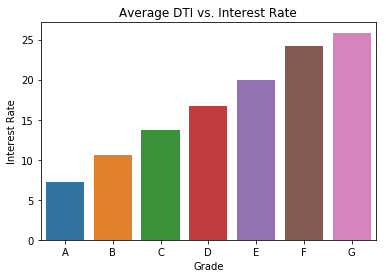

In [13]:
#1.4 (c)

#### 1.5(a) Convert int_rate to float 
df['int_rate'] = df['int_rate'].str.replace('%','')
df['int_rate'] = df['int_rate'].astype(np.float32)

ax = sns.barplot(x='grade', y='int_rate', data=df.groupby('grade')['int_rate'].mean().reset_index())
ax.set(xlabel='Grade', ylabel='Interest Rate');
ax.set_title('Average DTI vs. Interest Rate');

<font color='blue'> Grade A and Grade G has least and highest interest rates respectively. </font>

** 1.5 (a) Ensure that all categorical columns are actually categorical (that you found in 1.1). If not make necessary changes. **

**(b) Convert to numeric `grade` and `sub_grade`. **

In [14]:
# your code here

#### 1.5(a) Convert int_rate to float  - Done in 1.4 
#df['int_rate'] = df['int_rate'].str.replace('%','')
#df['int_rate'] = df['int_rate'].astype(np.float32)


In [15]:
# your code here
print(df[['grade','sub_grade']].head())
categorical = ['grade', 'sub_grade']

lbl = preprocessing.LabelEncoder()
for col in categorical:
    df[col] = lbl.fit_transform(df[col].astype(str))
print(df[['grade','sub_grade']].head())

  grade sub_grade
0     A        A3
1     C        C1
2     C        C3
3     D        D1
4     C        C3
   grade  sub_grade
0      0          2
1      2         10
2      2         12
3      3         15
4      2         12


**1.6 Divide the dataset into X_train, y_train, X_test, y_test, ratio 80:20, random_state = 109, stratify on `loan_status`.**

**Check the ratio for y_train and y_test**

In [16]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'loan_status'], df.loan_status, test_size=0.2, random_state=109, stratify=df.loan_status)
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)



(1    0.807139
 0    0.192861
 Name: loan_status, dtype: float64, 1    0.807136
 0    0.192864
 Name: loan_status, dtype: float64)

**Problem 2: Building Models. We will be using log_loss as evaluation metric.**

**2.1 Explain the difference between accuracy and log loss. (No code needed) **


*Your answer here*

Both accuracy and logloss are applicable for classification problems (similar to this one).  For accuracy we aim to maximize, logloss - lower the better. 

Logloss takes into account the uncertainty of the predictions i.e. input to logloss function is predicted probabilities from the model. 

In this particular problem, if we use accuracy we may end up getting the same accuracy for many models. It would be hard to distinguish which model is performing better with similar accuracies. 



**2.2 Fit a Linear Regression model on training data. Report log loss on `X_test`. What problems do you see in using Linear Regression for this problem ? **

In [17]:
# your code here
start = time.time()
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print_model = model.summary()

linear_reg_log_loss = log_loss(y_test, model.predict(X_test))
print(linear_reg_log_loss)

#All zeros would give accuracy score 0.8071364 and Linear Regression gives accuracy of 0.8088706710809817
print(accuracy_score(y_test, model.predict(X_test)>0.5), accuracy_score(y_test,np.zeros(y_test.shape)))
end = time.time()

print(f'{(end-start)/60:4.2f} minutes')


0.49291220203318037
0.8088706710809817 0.19286352409480267
0.03 minutes


**2.3 Fit a Logisitc Regression model. Choose appropriate value of C. Set random_state=109. Report log loss on `X_test`. **

** Hints: **  <br/>
*You may set max_iter=1000* <br/>
*You may set solver = 'liblinear' to avoid warnings.* 

In [18]:
# your code here
start = time.time()
model = LogisticRegression(C=10000, random_state=109, max_iter=1000, solver='liblinear')
model.fit(X_train,y_train)
preds = model.predict_proba(X_test)
logistic_reg_log_loss = log_loss(y_test, preds[:,1])
print(logistic_reg_log_loss)

print(accuracy_score(y_test, preds[:,1]>0.5), accuracy_score(y_test,np.zeros(y_test.shape)))
end = time.time()

print(f'{(end-start)/60:4.2f} minutes')


0.4508011321842948
0.8083188817068685 0.19286352409480267
0.90 minutes


**2.4 Fit a regularized model using `LogisticRegression()`. Set penalty = l2, random_state = 109. ** 

**Report logloss on X_test.**

**Should you standardize your data before fitting regularized model ? Y/N and explain why.  ** 

**Hints: ** <br/>
*You may set max_iter = 1000, C = 0.11*
<br/>
*You may set solver='liblinear' to avoid warnings.*


In [19]:
# your code here
start = time.time()

scaler = StandardScaler().fit(X_train.astype(np.float64)) #to float64 to avoid warning.
train_scaled = scaler.transform(X_train.astype(np.float64))
test_scaled = scaler.transform(X_test.astype(np.float64))

model = LogisticRegression(C=0.11, random_state=109,penalty='l2' ,max_iter=1000, solver='liblinear')
model.fit(train_scaled,y_train)
preds = model.predict_proba(test_scaled)
reg_log_loss = log_loss(y_test, preds[:,1])

print(reg_log_loss)

end = time.time()

print(f'{(end-start)/60:4.2f} minutes')


0.4430876816102934
0.18 minutes


**2.5 (a) Create Bagging Classifier and Random Forest Model.**
*For bagging classifier set n_estimators = 100 and random_state = 109*
*For Random Forest set n_estimators = 500 and random_state = 109.*
**Report logloss on X_test.**

**2.5 (b) Explain the difference between Bagging and Random Forest. (No code) **

**Hints:**
<br/>
*It took ~12 mins on a 16GB, quad core, old macbook to run Bagging Classifier.* <br/>
*It took ~6 mins on a 16GB, quad core, old macbook to run RandomForest Classifier.*

In [20]:
# your code here
start = time.time()
model = BaggingClassifier(random_state=109, n_estimators=100)
model.fit(X_train, y_train)
preds = model.predict_proba(X_test)
bagging_log_loss = log_loss(y_test, preds[:,1])
print(bagging_log_loss)
end = time.time()

print(f'{(end-start)/60:4.2f} minutes')


0.4649295199695842
11.77 minutes


In [21]:
# your code here
start = time.time()

model = RandomForestClassifier(n_estimators = 500, random_state = 109)
model.fit(X_train,y_train)
preds = model.predict_proba(X_test)
rf_log_loss = log_loss(y_test, preds[:,1])
print(rf_log_loss)

end = time.time()

print(f'{(end-start)/60:4.2f} minutes')

0.44520850360103137
6.11 minutes


*your answer here*

#2.5b
- Boosting is done iteratively, while bagging can be easily parellelized. 

- Bagging is an ensemble classifier that consists of several classifiers each operating on a bootstrapped training set and outputs the class based on the outputs of these individual classifiers.

- Some random forests can be thought of as a special case of Bagging. 

- The fundamental difference between bagging and random forest is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node. https://stats.stackexchange.com/questions/264129/what-is-the-difference-between-bagging-and-random-forest-if-only-one-explanatory

**2.6 Create a NN Model. You may use following hints as starting point. ** <br/>
**Should you standardize your data before fitting NN model ? Y/N and explain.**

Hints:

Nodes per Layer: 40, 30, 25, 20, 15, 10, 5, 1 [Total 7 layers + last layer] <br/> 
Activation function: reLU <br/>
Optimizer: Nadam (use the defaults; no other tuning) <br/>
Epochs: No more than 50 <br/>
Batch size: 256 <br/>
Validation_data = Same as previous models <br/>
<br/>
Choose appropriate loss function and activation function for last layer. <br/>

You may regularize, kernel_initializer = 'glorot_uniform' and/or Early stopping  and/or by adding dropout of 0.2 before the final layer. 


In [22]:
# your code here
start = time.time()
# Initializing the NN
model = Sequential()

# layers
model.add(Dense(units = 40, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 86))
model.add(Dense(units = 30, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 25, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 20, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 15, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 10, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dense(units = 5, kernel_initializer = 'glorot_uniform', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
print(model.summary())
# Compiling the ANN
model.compile(optimizer = 'Nadam', 
              loss = 'binary_crossentropy' ,
              metrics = ['accuracy'])

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor='val_loss', patience=4),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

# Train the ANN
history = model.fit(train_scaled, y_train, batch_size = 256, epochs = 50, 
                    callbacks=callbacks, # Early stopping
                    validation_data = (test_scaled, y_test))

nn_log_loss = model.evaluate(test_scaled, y_test)[0]
print(nn_log_loss)

end = time.time()
print(f'{(end-start)/60:4.2f} minutes')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                3480      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                775       
_________________________________________________________________
dense_4 (Dense)              (None, 20)                520       
_________________________________________________________________
dense_5 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
__________

** Problem 3: Create a table comparing all validation log losses you found above. Which model did best ? Would you invest your money based on these results? What could you improve?  (code optional)  **

In [36]:
#your code here
data = {'Model':['Linear Regression', 'Logistic Regression', 'Regularized Model', 'Bagging', 'Random Forest', 'NN Model'],
        'Logloss':[linear_reg_log_loss , logistic_reg_log_loss, reg_log_loss, bagging_log_loss, rf_log_loss, nn_log_loss]}
pd.DataFrame(data).sort_values('Logloss')


,Model,Logloss
5,NN Model,0.442368
2,Regularized Model,0.443088
4,Random Forest,0.445209
1,Logistic Regression,0.450801
3,Bagging,0.464930
0,Linear Regression,0.492912


*your answer here*

#Best Model = NN Model  (Although many models are very close)

#What could you improve
Answers vary - 5 fold CV, Parameter tuning, Feature engineering, external data etc. 


<hr style="height:2pt">